# Machine Learning Foundation

## Course 3, Part a: Logistic Regression LAB


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration 
- Triaxial Angular velocity from the gyroscope 
- A 561-feature vector with time and frequency domain variables 
- The activity label 

More information about the features are available on the website linked above.


Install the below libraries


In [1]:
import piplite as pl
await pl.install(['seaborn','numpy','pandas','scikit-learn'])

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# import seaborn as sns, pandas as pd, numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts.
* Determine if the floating point values need to be scaled.
* Determine the breakdown of each activity.
* Encode the activity label as an integer.


In [4]:
import pyodide_http as ph
ph.patch_all()
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [5]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


The data columns are all floats except for the activity label.


In [6]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

In [7]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).


In [8]:
# without last column
data.iloc[:, :-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [9]:
# without last column
data.iloc[:, :-1].max().value_counts()

1.0    561
Name: count, dtype: int64

In [10]:
# including last column
data.min().value_counts()

-1.0       561
 LAYING      1
Name: count, dtype: int64

In [11]:
# including last column
data.max().value_counts()

1.0                 561
WALKING_UPSTAIRS      1
Name: count, dtype: int64

Examine the breakdown of activities; they are relatively balanced.


In [12]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

In [13]:
data.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

7424    0
4311    3
1175    2
7179    2
9598    2
Name: Activity, dtype: int32

In [15]:
data.Activity.unique()

array([2, 1, 0, 3, 4, 5])

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values.
* Identify those that are most correlated (either positively or negatively).


In [16]:
feature_cols = data.columns[:-1]
feature_cols

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [28]:
# calculate the correlation values
corr_values = data[feature_cols].corr()
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.036047,0.013241,-0.066233,0.027464,0.001902,-0.004984,0.027729,-0.002924,-0.009873,0.033533,...,-0.029273,0.042123,0.035684,-0.013009,0.010679,1.000000,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",0.034296,0.077627,-0.030748,-0.027123,-0.015784,-0.012196,-0.027097,-0.013411,-0.012800,-0.030908,...,-0.002618,-0.013065,-0.011829,-0.027478,0.023605,-0.112454,1.000000,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",-0.041021,-0.007513,0.003215,-0.374104,-0.381391,-0.353271,-0.371168,-0.378013,-0.355836,-0.384244,...,0.087571,-0.085226,-0.081971,0.008050,0.017534,-0.007095,0.024822,1.000000,-0.748249,-0.635231
"angle(Y,gravityMean)",0.034053,-0.005616,-0.012986,0.449425,0.506106,0.459092,0.444926,0.507947,0.460345,0.458832,...,-0.105752,0.087671,0.078010,0.003082,-0.007256,-0.006444,-0.004582,-0.748249,1.000000,0.545614


In [29]:
# return lower row and column indices of the lower triangular part
tril_index = np.tril_indices_from(corr_values)
# return two arrays: row indices & col indices
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [20]:
list(zip(*tril_index))[:5] # * called argument unpacking

[(np.int32(0), np.int32(0)),
 (np.int32(1), np.int32(0)),
 (np.int32(1), np.int32(1)),
 (np.int32(2), np.int32(0)),
 (np.int32(2), np.int32(1))]

In [30]:
# fill NaN to all lower triangular part
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.nan
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


In [22]:
# Testing stack() function

d = {'A': [1, 2], 'B': [3, 4]}

df = pd.DataFrame(d)
display(df)

h = df.stack() # fewer columns but more rows
display(h)

h.unstack()   # from row to columns

,A,B
0,1,3
1,2,4


0  A    1
   B    3
1  A    2
   B    4
dtype: int64

,A,B
0,1,3
1,2,4


In [31]:
corr_values = corr_values.stack().to_frame().reset_index() \
                            .rename(columns={'level_0':'feature_1',
                                             'level_1':'feature_2',
                                             0:'correlation'})
corr_values

,feature_1,feature_2,correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


In [32]:
corr_values[corr_values.isna()].sample(5)

,feature_1,feature_2,correlation
90364,NaN,NaN,NaN
98066,NaN,NaN,NaN
91312,NaN,NaN,NaN
60769,NaN,NaN,NaN
78801,NaN,NaN,NaN


In [33]:
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values

,feature_1,feature_2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


A histogram of the absolute value correlations.


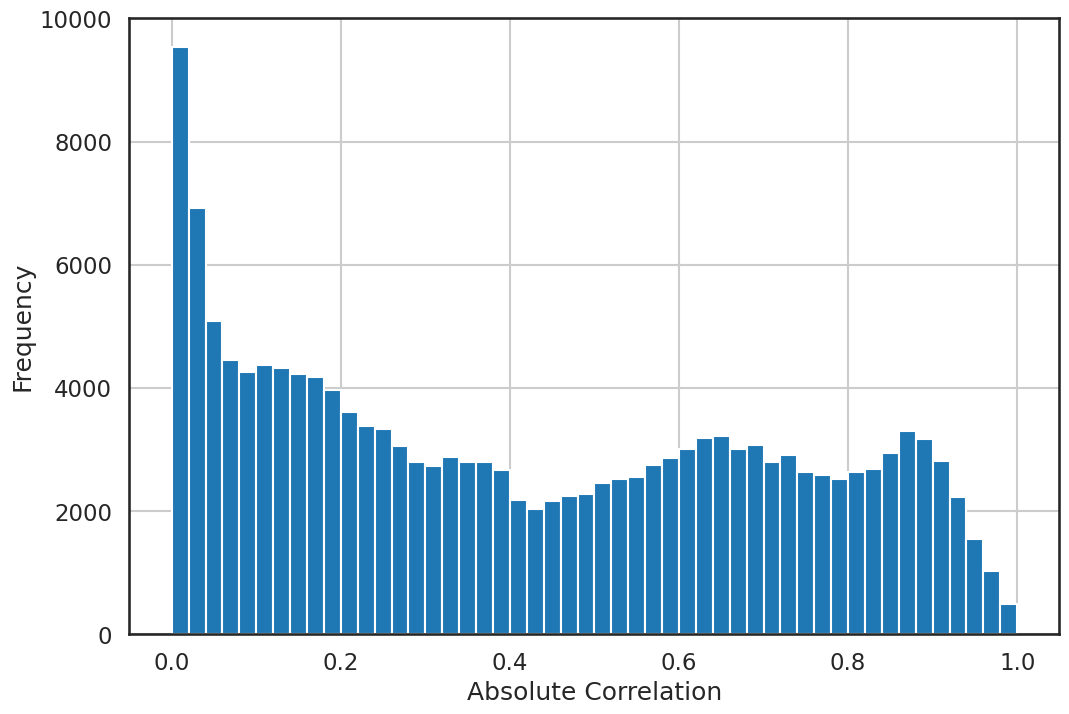

In [34]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [35]:
corr_values.sort_values('correlation', ascending=False)

,feature_1,feature_2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [25]:
corr_values[corr_values['abs_correlation'] > 0.8].sort_values('correlation', ascending=False)

,feature_1,feature_2,correlation,abs_correlation
95316,tBodyAccMag-arCoeff()1,tGravityAccMag-arCoeff()1,1.000000,1.000000
92104,tBodyAccMag-mean(),tBodyAccMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
96366,tBodyAccMag-arCoeff()4,tGravityAccMag-arCoeff()4,1.000000,1.000000
109498,tBodyGyroJerkMag-mean(),tBodyGyroJerkMag-sma(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [36]:
# same with the above code
corr_values.sort_values('correlation', ascending=False).query('abs_correlation > 0.8')

,feature_1,feature_2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.


In [37]:
feature_cols

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

# create object first
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3, 
                                          random_state=42)  

In [39]:
strat_shuf_split.split(data[feature_cols], data.Activity)

<generator object BaseShuffleSplit.split at 0x11c3a0f0>

In [40]:
next(strat_shuf_split.split(data[feature_cols], data.Activity))

(array([1575, 1707, 6425, ..., 3037, 3002,  996]),
 array([7743,  969, 3175, ..., 8914, 8756, 1470]))

In [41]:
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))
train_idx, test_idx

(array([1575, 1707, 6425, ..., 3037, 3002,  996]),
 array([7743,  969, 3175, ..., 8914, 8756, 1470]))

In [42]:
# testing
print(data.iloc[train_idx,:].Activity.value_counts())
print(data.iloc[test_idx,:].Activity.value_counts())

Activity
0    1361
2    1334
1    1244
3    1205
5    1081
4     984
Name: count, dtype: int64
Activity
0    583
2    572
1    533
3    517
5    463
4    422
Name: count, dtype: int64


In [43]:
# Separate dataframe
X_train = data.loc[train_idx, feature_cols]
X_test = data.loc[test_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']
y_test = data.loc[test_idx, 'Activity']

In [44]:
y_train.value_counts()

Activity
0    1361
2    1334
1    1244
3    1205
5    1081
4     984
Name: count, dtype: int64

In [45]:
y_train.value_counts(normalize=True)

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [46]:
y_test.value_counts()

Activity
0    583
2    572
1    533
3    517
5    463
4    422
Name: count, dtype: int64

In [47]:
y_test.value_counts(normalize=True)

Activity
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: proportion, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


In [48]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [49]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [50]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

## Question 5

* Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 


In [52]:
lr.coef_.shape, lr.coef_.T.shape

((6, 561), (561, 6))

In [57]:
# Test with one sample data
columns = pd.MultiIndex(levels=[['lr'], [0,1,2,3,4,5]], codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
print(columns)
pd.DataFrame(lr.coef_.T, columns=columns)

MultiIndex([('lr', 0),
            ('lr', 1),
            ('lr', 2),
            ('lr', 3),
            ('lr', 4),
            ('lr', 5)],
           )


lr                                                  
            0         1         2         3         4         5
0   -0.087506 -0.445226  0.257963 -0.169299  0.765611 -0.080084
1    0.014493 -0.201047  0.060892 -0.023510  0.107967 -0.247193
2    0.030187  0.063196  0.245909  0.022335  0.058980 -0.402526
3    0.004590 -0.733963 -0.352732 -0.701341  0.266984  0.696120
4   -0.045407 -0.034155 -0.451850  0.260282 -0.516844  0.106248
..        ...       ...       ...       ...       ...       ...
556 -0.022132 -0.659469  0.550630 -0.234976  0.385179 -0.351492
557  0.058454 -0.246970  0.268995 -0.162026 -0.157603  0.174153
558  1.599105 -2.473095 -0.854612 -0.313141 -0.712694  0.416311
559 -0.374313 -0.740396  1.771455 -0.242904 -0.275139  0.876728
560 -0.188309 -0.298022  0.416920  0.065047 -0.042363  0.438816

[561 rows x 6 columns]

In [55]:
# initialize list variable
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab, mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_

    # construct two layers columns (called MultiIndex)
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])

    # append dataframe into the list
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

# vertical combination of three dataframes
coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
485  0.002454  0.236393  0.189859 -0.066301  0.130902  0.330773  0.000000   
442 -0.020894 -0.258438  0.211527 -0.417591 -0.262177  0.826080  0.000000   
317 -0.024262  0.070896 -0.009851  0.464254  0.142857 -0.669523 -0.267026   
87  -0.072669 -0.278078 -0.409067  0.431249 -0.305554 -0.029886 -0.093519   
218 -0.009503 -0.443983 -0.203980 -0.094980 -0.379478 -0.075134  0.000000   
309  0.018016  0.147317  0.287253 -0.059195  0.081341  0.251610  0.000000   
353 -0.054494 -0.184109 -0.196497  0.411172 -0.382683 -0.403913 -0.001378   
82  -0.020494 -0.302220  0.327782 -0.026379  0.114641 -0.302976  0.000000   
455  0.375687  0.494908 -0.287333 -0.004301  0.381322  0.089570  0.000000   
23   0.159238  0.802588 -0.894417  0.244158  0.754602 -0.473660  0.324108   

                                                             l2            \
            1         2         3         4         5         0         1   
485  0.214387  0.016013  0.000000  0.203693  0.546822 -0.016229  0.669286   
442  0.000000  0.000000 -0.242083 -0.423246  1.149265 -0.031633 -1.451226   
317  0.000000  0.000000  0.512948  0.007178 -0.866895 -0.059729 -0.037725   
87   0.000000 -0.172421  0.566897 -0.447202  0.642768 -0.119114 -0.842142   
218 -0.341470 -0.180923  0.000000 -1.124166 -0.698759  0.017143 -1.011992   
309  0.000000  0.201849  0.000000  0.000000  0.368939  0.013644  0.380131   
353  0.000000  0.000000  0.485489 -0.725806 -0.876735 -0.097967 -0.456334   
82  -1.115913  1.306518 -0.049106  0.000000 -0.023154 -0.020849 -1.214322   
455  1.080033  0.000000  0.000000  0.886482  0.078798  0.726807  3.071876   
23   1.437985 -1.447817  0.794392  1.945470  0.851965  0.383042  1.636204   

                                             
            2         3         4         5  
485  0.194251 -0.212741  0.161498  1.360131  
442  0.436363 -1.037668 -0.430442  2.137244  
317 -0.010820  1.113845  0.415977 -2.533809  
87  -0.533537  0.944348 -0.538715  0.146947  
218 -0.204232 -0.087523 -0.931614 -0.173495  
309  0.418204 -0.282691 -0.074395  0.421807  
353 -0.275696  1.169781 -0.911152 -2.475120  
82   0.686421 -0.112766  0.317400 -0.448916  
455 -0.612815  0.029093  0.695218  0.260689  
23  -1.186563  0.455125  1.662346 -0.819802

Prepare six separate plots for each of the multi-class coefficients.


[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

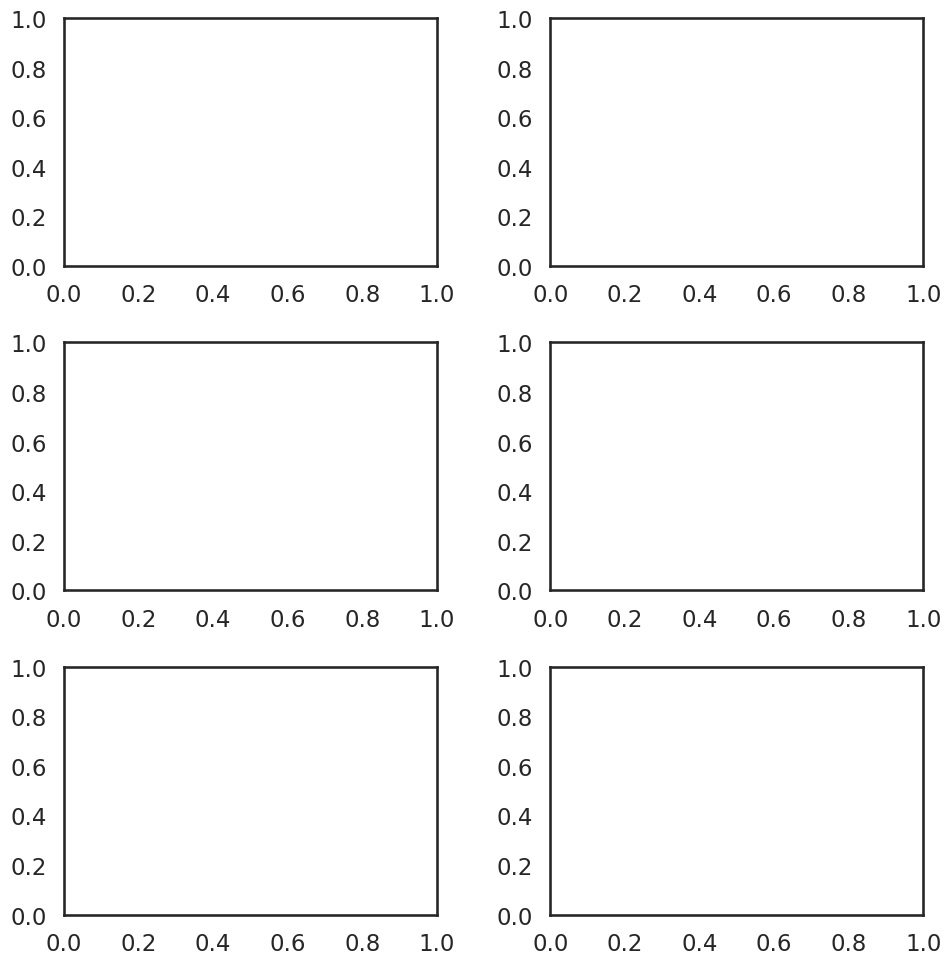

In [60]:
fig, axList = plt.subplots(nrows=3, ncols=2)
print(axList)
axList = axList.flatten()
fig.set_size_inches(10,10) # set figure size
plt.tight_layout()

axList

In [61]:
for loc, ax in enumerate(axList):
    print(loc)
    # extract data grouping lr, l1 and l2
    data = coefficients.xs(loc, level=1, axis=1)
    display(data)

0


,lr,l1,l2
0,-0.087506,0.00000,-0.135283
1,0.014493,0.00000,0.029334
2,0.030187,0.00000,0.040581
3,0.004590,0.00000,0.019091
4,-0.045407,0.00000,-0.035987
...,...,...,...
556,-0.022132,0.00000,-0.142627
557,0.058454,0.00000,0.119148
558,1.599105,3.07951,2.949029
559,-0.374313,0.00000,-0.543058


1


,lr,l1,l2
0,-0.445226,0.000000,-1.293646
1,-0.201047,0.000000,-1.109719
2,0.063196,0.000000,-1.314483
3,-0.733963,-1.780032,-2.522049
4,-0.034155,0.000000,0.628409
...,...,...,...
556,-0.659469,-0.765221,-0.825440
557,-0.246970,-0.667226,-0.675402
558,-2.473095,-7.889265,-9.746372
559,-0.740396,0.000000,2.593093


2


,lr,l1,l2
0,0.257963,0.000000,0.484658
1,0.060892,0.000000,0.106808
2,0.245909,0.000000,0.464223
3,-0.352732,-0.407977,-0.435127
4,-0.451850,-1.336530,-0.665765
...,...,...,...
556,0.550630,0.490099,0.584608
557,0.268995,0.862445,0.456851
558,-0.854612,0.000000,-0.922840
559,1.771455,0.000000,2.219867


3


,lr,l1,l2
0,-0.169299,-0.685851,-0.478891
1,-0.023510,0.000000,-0.153970
2,0.022335,0.000000,0.134567
3,-0.701341,-1.200542,-1.788829
4,0.260282,0.418667,0.902889
...,...,...,...
556,-0.234976,-0.537729,-0.632258
557,-0.162026,-0.309185,-0.486358
558,-0.313141,-0.405808,-0.832528
559,-0.242904,-0.767295,-0.940748


4


,lr,l1,l2
0,0.765611,4.395867,1.830121
1,0.107967,0.000000,0.186418
2,0.058980,0.000000,0.009780
3,0.266984,0.241674,0.278679
4,-0.516844,-1.743311,-0.974671
...,...,...,...
556,0.385179,0.522379,0.642547
557,-0.157603,-0.015177,-0.148041
558,-0.712694,-0.610402,-1.463029
559,-0.275139,0.000000,-0.660475


5


,lr,l1,l2
0,-0.080084,-0.829445,0.290944
1,-0.247193,-8.005695,-0.933761
2,-0.402526,-3.552263,-1.747010
3,0.696120,2.640638,3.384469
4,0.106248,-0.001719,0.147271
...,...,...,...
556,-0.351492,-0.819565,-1.023406
557,0.174153,0.871087,0.684749
558,0.416311,0.215581,1.659363
559,0.876728,3.917337,3.909528


`xs.()` means `cross-section` data extraction from MultiIndex Dataframe.  

`loc` = The value to filter at the specified level.  
`level=1` = Selects data from level 1 of the MultiIndex (column-wise).  
`axis=1` = Operates on columns (not rows).

In [62]:
for loc, ax in enumerate(axList):
    print(loc, ax)

0 Axes(0.0952361,0.716028;0.373076x0.247972)
1 Axes(0.581736,0.716028;0.373076x0.247972)
2 Axes(0.0952361,0.391694;0.373076x0.247972)
3 Axes(0.581736,0.391694;0.373076x0.247972)
4 Axes(0.0952361,0.0673611;0.373076x0.247972)
5 Axes(0.581736,0.0673611;0.373076x0.247972)


Axes(0.125,0.653529;0.352273x0.226471) | Axes(0.125,0.653529;0.352273x0.226471)
Axes(0.547727,0.653529;0.352273x0.226471) | Axes(0.125,0.653529;0.352273x0.226471)
Axes(0.125,0.381765;0.352273x0.226471) | Axes(0.125,0.653529;0.352273x0.226471)
Axes(0.547727,0.381765;0.352273x0.226471) | Axes(0.125,0.653529;0.352273x0.226471)
Axes(0.125,0.11;0.352273x0.226471) | Axes(0.125,0.653529;0.352273x0.226471)
Axes(0.547727,0.11;0.352273x0.226471) | Axes(0.125,0.653529;0.352273x0.226471)


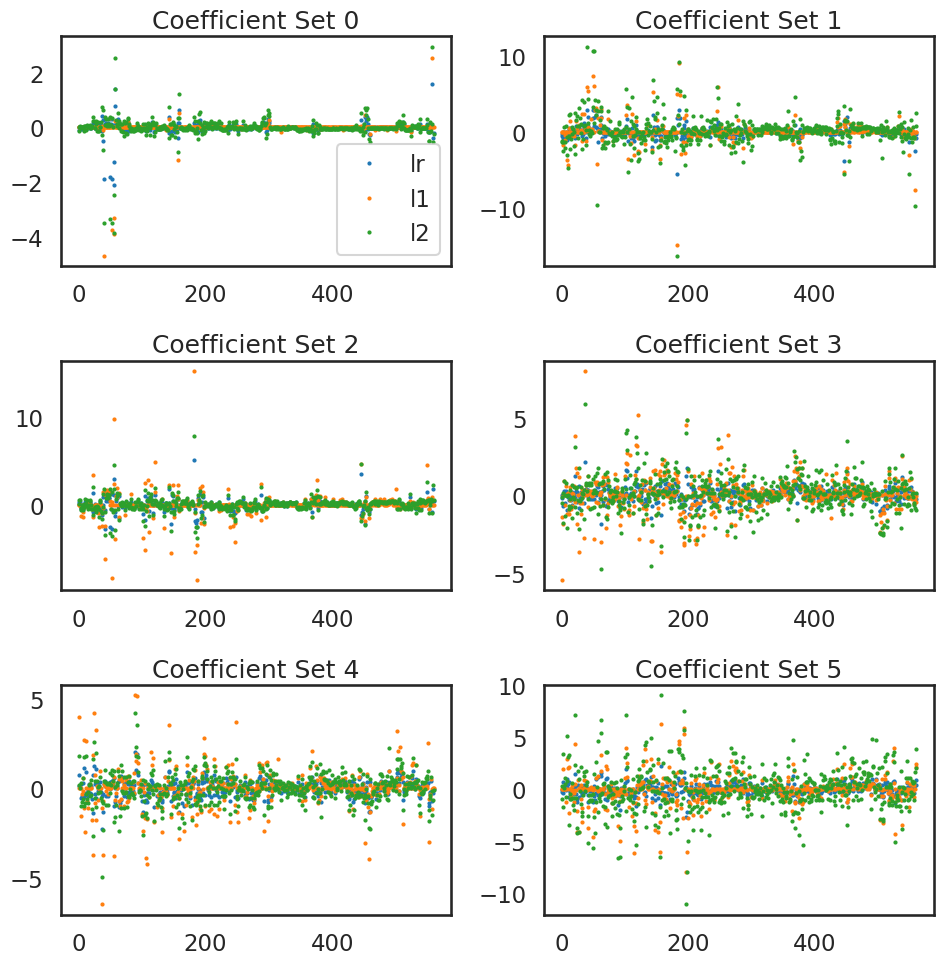

In [68]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for loc, ax in enumerate(axList):
    # loc = ax[0]
    # ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)

    print(str(ax) + ' | ' + str(axList[0]))
  
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set ' + str(loc))

plt.tight_layout()

## Question 6

* Predict and store the class for each model.
* Store the probability for the predicted class for each model. 


In [63]:
print(type(lr.predict(X_test)))
pd.Series(lr.predict_proba(X_test).max(axis=1), name='lr')

<class 'numpy.ndarray'>


0       0.998939
1       0.988165
2       0.987592
3       0.981381
4       0.998277
          ...   
3085    0.543470
3086    0.903354
3087    0.969642
3088    0.986840
3089    0.989855
Name: lr, Length: 3090, dtype: float64

In [64]:
# Create data frame using Series object
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab, mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1) 

In [65]:
# all values are the same in some samples
y_pred.head() 

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [66]:
y_pred[y_pred.lr != y_pred.l1]

,lr,l1,l2
88,2,1,1
197,2,1,1
296,1,2,1
388,1,2,1
430,4,5,4
489,2,1,1
769,4,3,3
853,5,3,3
1036,1,2,1
1071,1,2,2


In [102]:
y_prob.head()

,lr,l1,l2
0,0.998939,0.998797,0.999758
1,0.988165,0.999544,0.999477
2,0.987592,0.995519,0.999685
3,0.981381,0.999156,0.994338
4,0.998277,0.999920,0.999997


## Question 7

For each model, calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.


In [67]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [70]:
score(y_test, y_pred['lr']) # total 6 values per row

(array([1.        , 0.9588015 , 0.96322242, 0.99613153, 0.99526066,
        0.99568035]),
 array([1.        , 0.96060038, 0.96153846, 0.99613153, 0.99526066,
        0.99568035]),
 array([1.        , 0.95970009, 0.9623797 , 0.99613153, 0.99526066,
        0.99568035]),
 array([583, 533, 572, 517, 422, 463]))

In [107]:
# Precision, Recall, Fscore and Support values (average values)
score(y_test, y_pred['lr'], average='weighted')

(np.float64(0.9841438255400277),
 np.float64(0.9841423948220065),
 np.float64(0.9841428284156661),
 None)

In [108]:
# Accuracy Score
accuracy_score(y_test, y_pred['lr'])

0.9841423948220065

In [109]:
# label_binzarize is used to convert categorical labels into binary (one-hot encoded) format.
label_binarize(y_test, classes=[0,1,2,3,4,5])

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [112]:
# Test label_binzarize
from sklearn.preprocessing import label_binarize

y = [1, 2, 2, 1, 3]  # Class labels

# each value means each class in side the list
# total number of classes represent total columns
y_bin = label_binarize(y, classes=[1, 2, 4, 3]) 

print(y_bin)

[[1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]]


In [113]:
y_pred['lr'].unique()

array([3, 5, 1, 0, 2, 4])

**ROC** (Receiver Operating Characteristic) Curve   
- A graph that shows the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) at different threshold values.

**AUC** (Area Under the Curve)
- A single number representing the model's ability to distinguish between classes.

AUC = 1.0 --> Perfect classifier 🎯  
AUC = 0.5 --> Random guess (bad model) ❌  
AUC < 0.5 --> Worse than random (needs fixing!) 🔧

In [117]:
# AUC score
roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]), 
              label_binarize(y_pred['lr'], classes=[0,1,2,3,4,5]), 
              average='weighted')

np.float64(0.9903839811943528)

In [118]:
# Confusion matrix
confusion_matrix(y_test, y_pred['lr'])

array([[583,   0,   0,   0,   0,   0],
       [  0, 512,  21,   0,   0,   0],
       [  0,  22, 550,   0,   0,   0],
       [  0,   0,   0, 515,   1,   1],
       [  0,   0,   0,   1, 420,   1],
       [  0,   0,   0,   1,   1, 461]], dtype=int64)

In [122]:
cm = dict()
cm['lr'] = confusion_matrix(y_test, y_pred['lr'])
cm

{'lr': array([[583,   0,   0,   0,   0,   0],
        [  0, 512,  21,   0,   0,   0],
        [  0,  22, 550,   0,   0,   0],
        [  0,   0,   0, 515,   1,   1],
        [  0,   0,   0,   1, 420,   1],
        [  0,   0,   0,   1,   1, 461]], dtype=int64)}

In [124]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [125]:
metrics

,lr,l1,l2
precision,0.984144,0.983835,0.983824
recall,0.984142,0.983819,0.983819
fscore,0.984143,0.983815,0.983819
accuracy,0.984142,0.983819,0.983819
auc,0.990384,0.990144,0.990165


In [126]:
cm

{'lr': array([[583,   0,   0,   0,   0,   0],
        [  0, 512,  21,   0,   0,   0],
        [  0,  22, 550,   0,   0,   0],
        [  0,   0,   0, 515,   1,   1],
        [  0,   0,   0,   1, 420,   1],
        [  0,   0,   0,   1,   1, 461]], dtype=int64),
 'l1': array([[583,   0,   0,   0,   0,   0],
        [  0, 506,  27,   0,   0,   0],
        [  0,  21, 551,   0,   0,   0],
        [  0,   0,   0, 517,   0,   0],
        [  0,   0,   0,   0, 422,   0],
        [  0,   0,   0,   2,   0, 461]], dtype=int64),
 'l2': array([[583,   0,   0,   0,   0,   0],
        [  0, 510,  23,   0,   0,   0],
        [  0,  23, 549,   0,   0,   0],
        [  0,   0,   0, 517,   0,   0],
        [  0,   0,   0,   1, 421,   0],
        [  0,   0,   0,   2,   1, 460]], dtype=int64)}

## Question 8

* Display or plot the confusion matrix for each model.


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

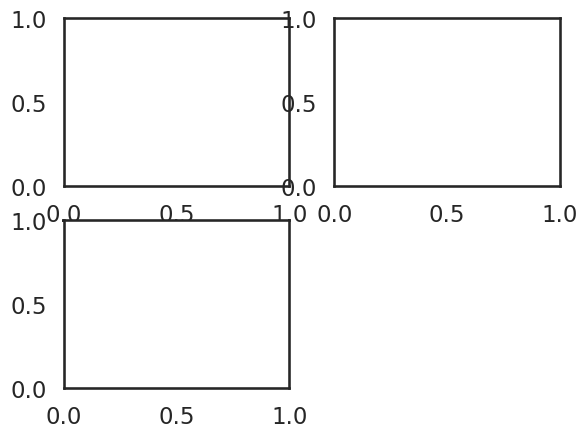

In [136]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()

axList[-1].axis('off') # exclude the last one

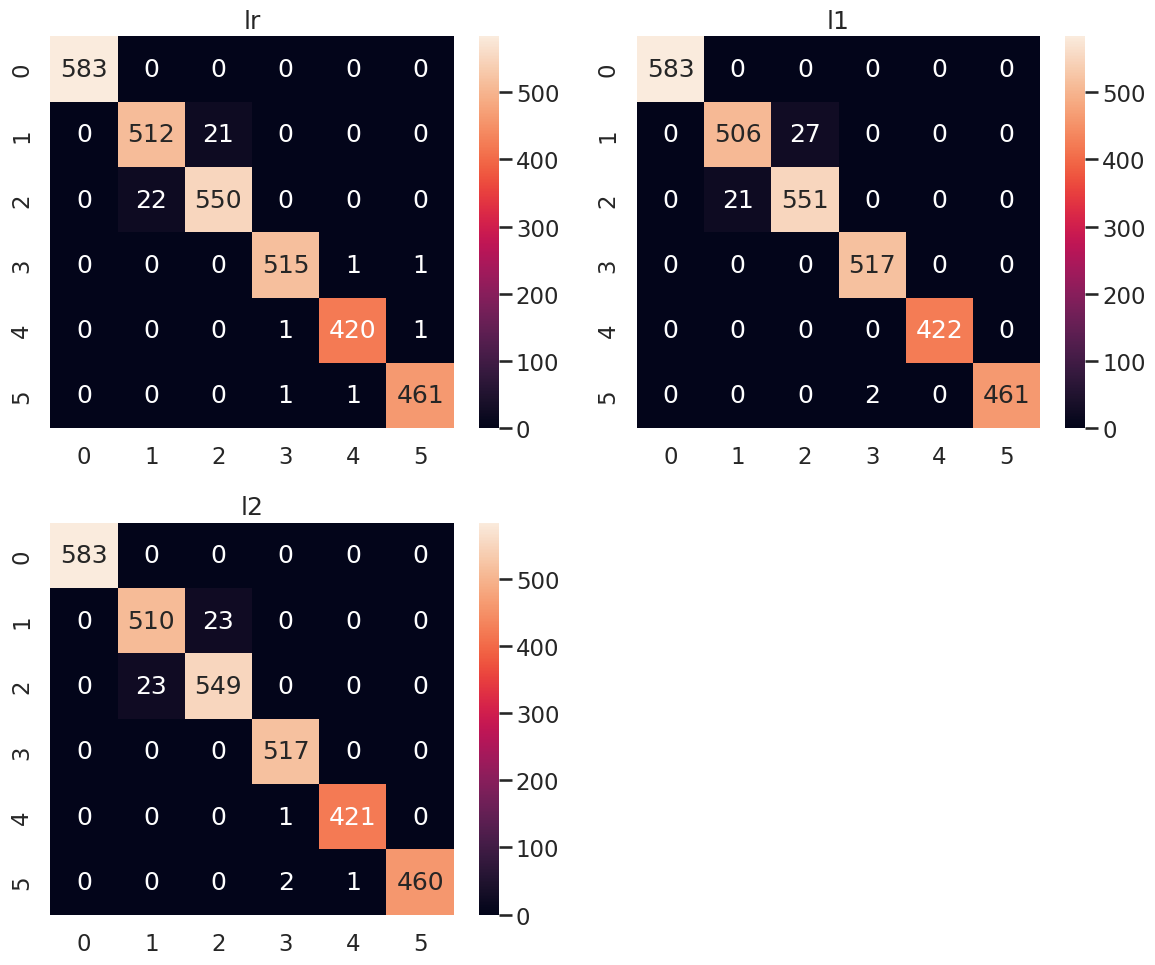

In [137]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax, lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
plt.show()

---
### Machine Learning Foundation (C) 2020 IBM Corporation
